In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
#warnings.filterwarnings("ignore")

In [2]:
data_org= pd.read_csv("bank-additional/bank-additional/bank-additional-full.csv",sep=";")
data=shuffle(data_org)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33106,51,blue-collar,divorced,high.school,no,yes,yes,cellular,may,tue,...,6,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
39960,32,blue-collar,single,high.school,no,no,no,cellular,jun,mon,...,1,2,2,success,-1.7,94.055,-39.8,0.754,4991.6,yes
34489,24,admin.,single,high.school,no,no,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
32438,34,blue-collar,married,university.degree,no,yes,no,cellular,may,fri,...,2,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
26964,36,services,married,basic.9y,unknown,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
26729,42,blue-collar,married,basic.9y,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
21542,42,admin.,divorced,university.degree,no,no,no,cellular,aug,tue,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
23970,53,management,married,university.degree,no,yes,yes,telephone,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
14043,37,admin.,single,university.degree,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
37846,25,student,single,unknown,unknown,yes,no,cellular,aug,fri,...,1,999,2,failure,-2.9,92.201,-31.4,0.825,5076.2,no


In [84]:
N=30000
train_data=data[:N]
test_data=data[N:]

In [85]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [86]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<IPython.core.display.Javascript object>


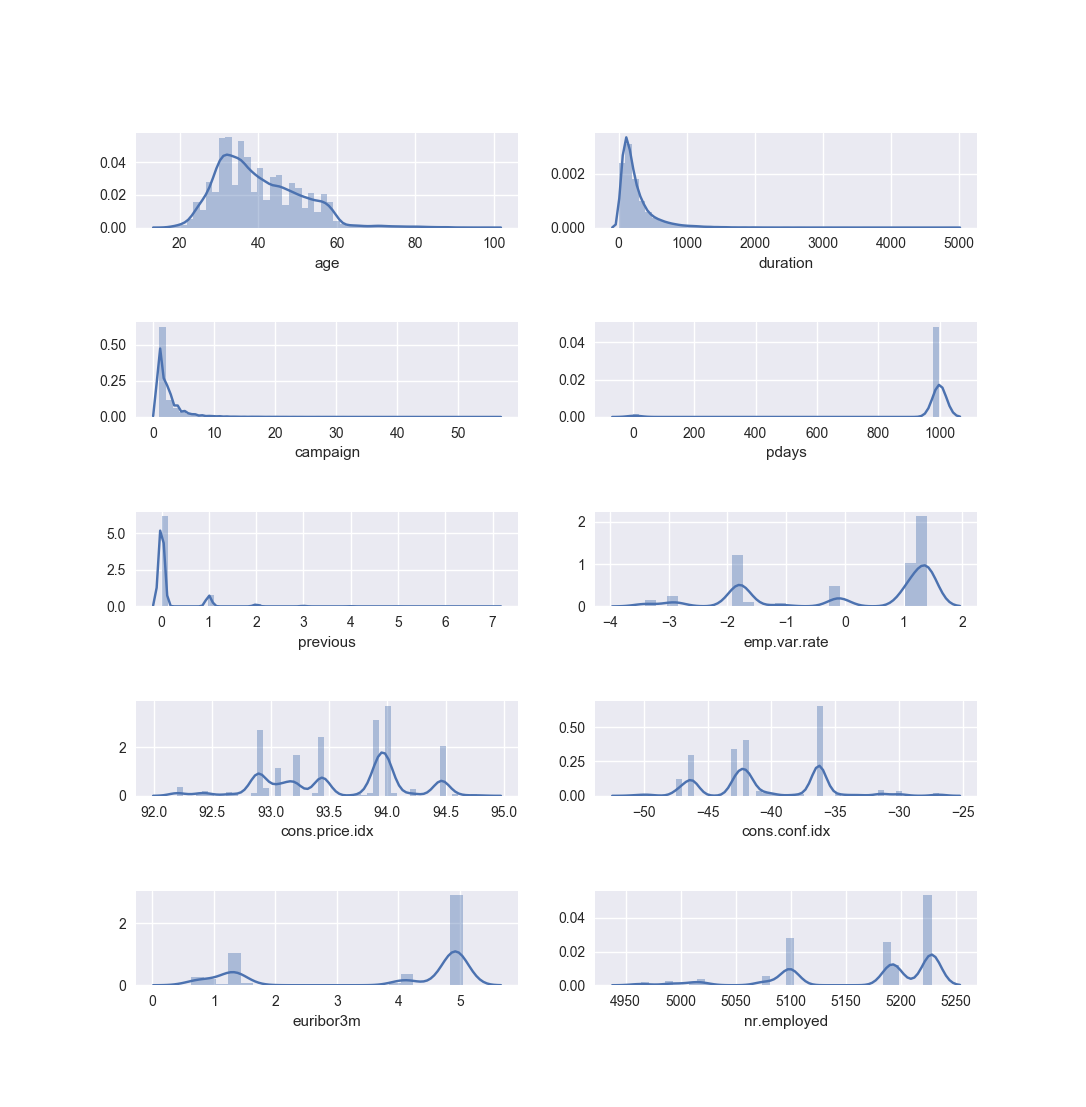

In [355]:
num_colnames=data.select_dtypes(include=["int64","float64"]).columns.values
nsubplots=len(num_colnames)
rows=int(nsubplots/2) + nsubplots%2
cols=2
fig,ax=plt.subplots(rows,cols,figsize=(10,10))
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[num_colnames[i*cols+j]],ax=ax[i,j])
plt.subplots_adjust(hspace=1)

<IPython.core.display.Javascript object>


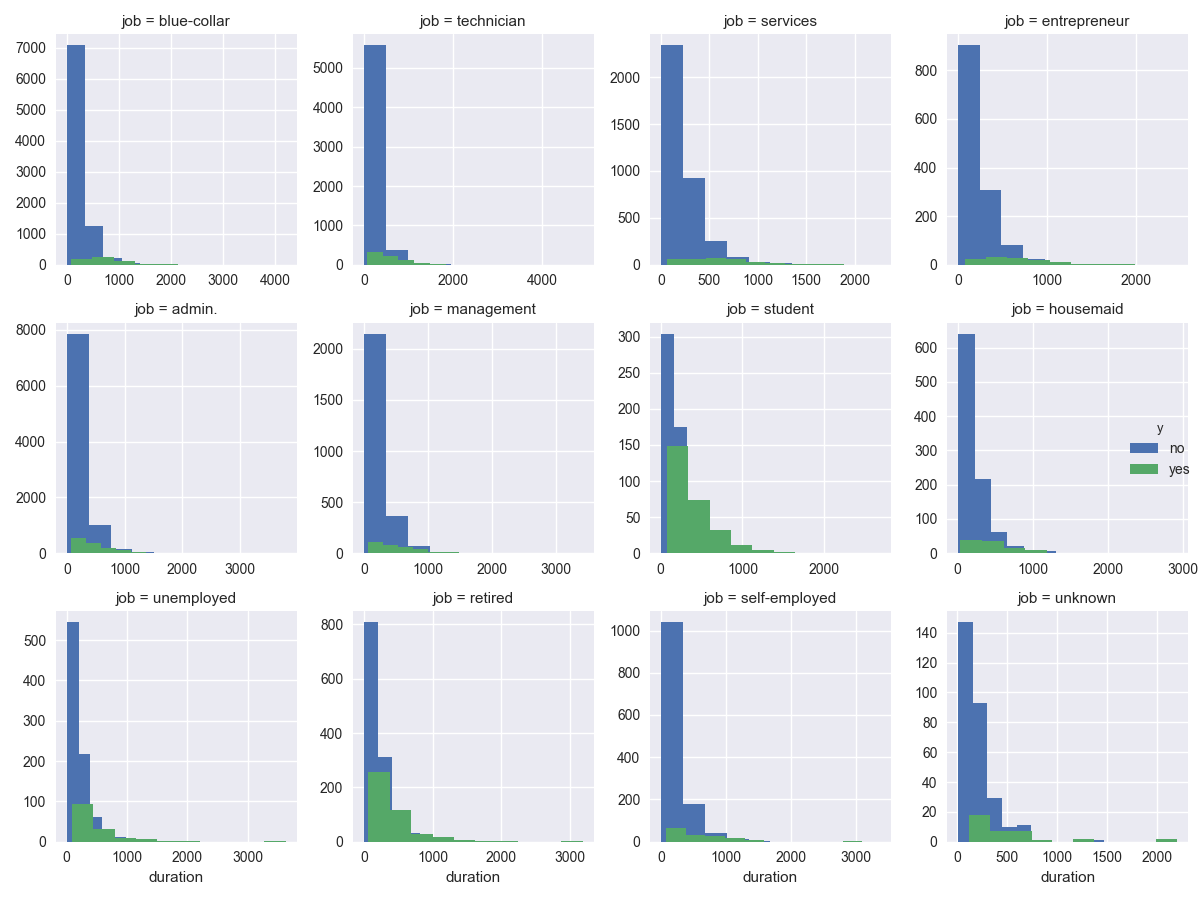

In [384]:
sns.FacetGrid(data,col="job",hue="y",col_wrap=4,sharex=False,sharey=False).map(plt.hist,"duration").add_legend()


<IPython.core.display.Javascript object>


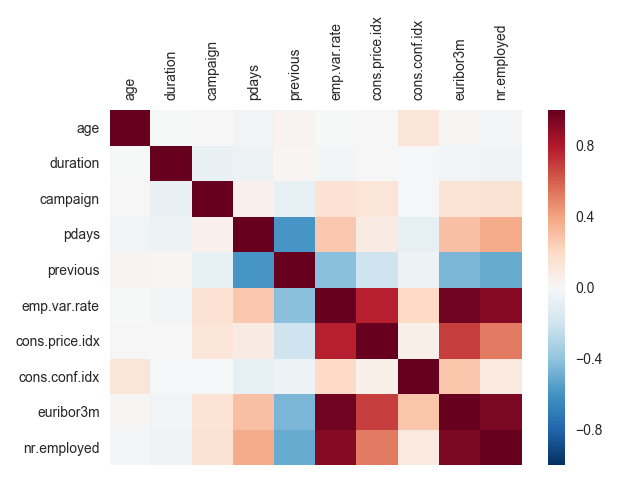

In [353]:
fig,ax1=plt.subplots(1,1)
sns.heatmap(data.corr(),ax=ax1)
ax=plt.gca()
ax.xaxis.tick_top()
for xlabel,ylabel in zip(ax.get_xticklabels(),ax.get_yticklabels()):
    xlabel.set_rotation(90)
    ylabel.set_rotation(0)
fig.tight_layout()

In [572]:
obj_columns=data.select_dtypes(include=["object"]).columns.values
obj_columns

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y'], dtype=object)

In [573]:
for obj in obj_columns:
    print("{} :".format(obj),"",data[obj].unique())
    

job :  ['blue-collar' 'technician' 'services' 'entrepreneur' 'admin.' 'management'
 'student' 'housemaid' 'unemployed' 'retired' 'self-employed' 'unknown']
marital :  ['married' 'single' 'divorced' 'unknown']
education :  ['basic.9y' 'professional.course' 'high.school' 'basic.6y' 'basic.4y'
 'university.degree' 'unknown' 'illiterate']
default :  ['no' 'unknown' 'yes']
housing :  ['no' 'yes' 'unknown']
loan :  ['no' 'yes' 'unknown']
contact :  ['cellular' 'telephone']
month :  ['nov' 'may' 'jun' 'jul' 'aug' 'oct' 'mar' 'apr' 'sep' 'dec']
day_of_week :  ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome :  ['nonexistent' 'failure' 'success']
y :  ['no' 'yes']


<IPython.core.display.Javascript object>


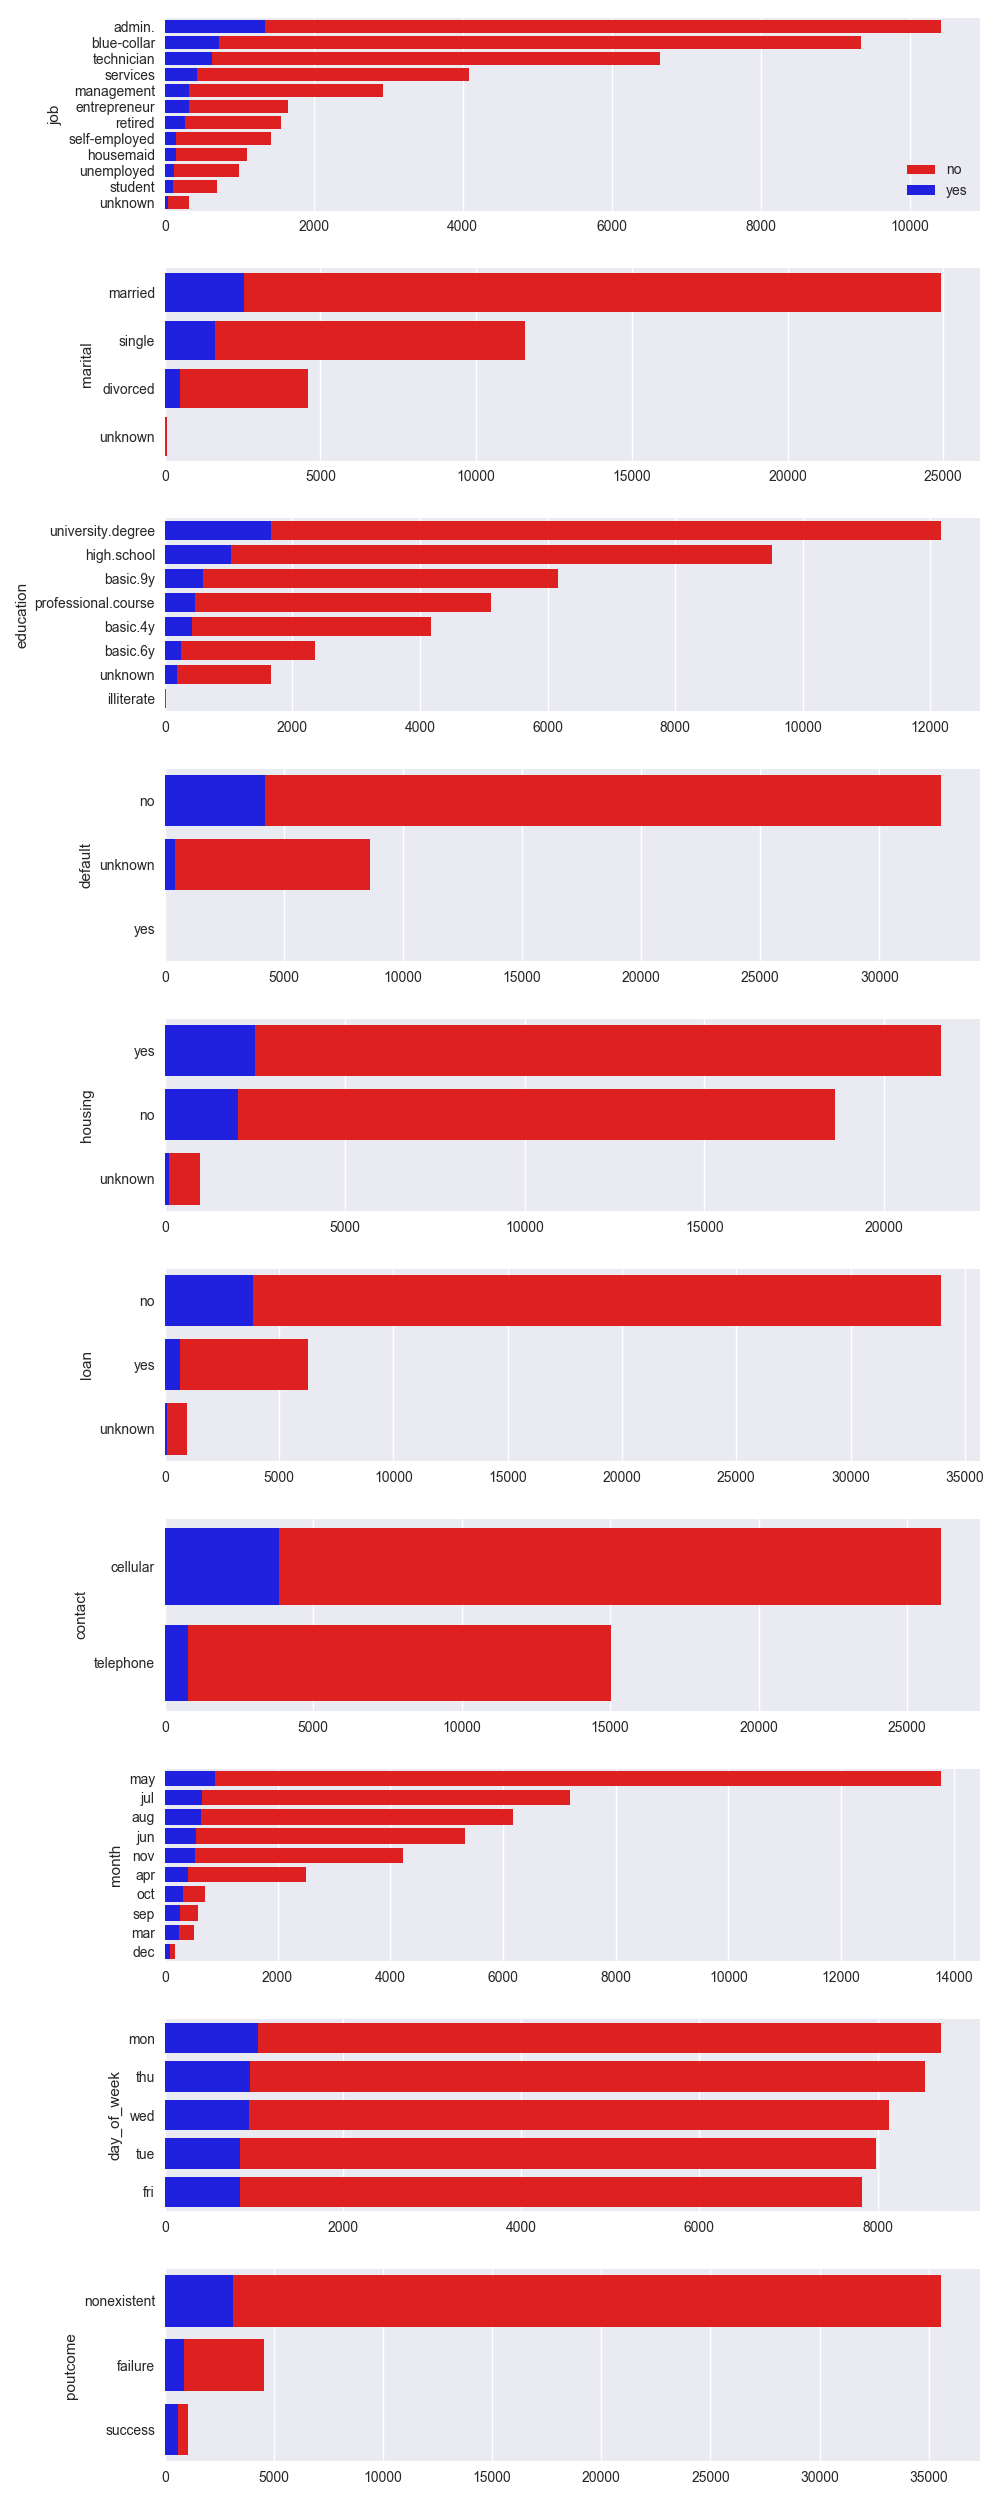

In [578]:
rows=len(obj_columns)-1
fig,ax=plt.subplots(rows,figsize=(10,25))
for i,obj in enumerate(obj_columns[:-1]):
    try:
        obj_yes=data[data["y"]=="yes"][obj].value_counts()
        obj_no=data[data["y"]=="no"][obj].value_counts()
        if False in np.array(obj_yes.sort_index().index.values==obj_no.sort_index().index.values):
            uniq_setyes=(set(obj_yes.index.values)-(set(obj_yes.index.values)&set(obj_no.index.values)))
            uniq_setno=(set(obj_no.index.values)-(set(obj_yes.index.values)&set(obj_no.index.values)))
            if uniq_setno==set():
                while(uniq_setyes!=set()):
                    obj_no[uniq_setyes.pop()]=0
            elif uniq_setyes==set():
                while(uniq_setno!=set()):
                    obj_yes[uniq_setno.pop()]=0
        sns.barplot(y=obj_no.index,x=obj_no+obj_yes.values,color="r",label="no",ax=ax[i])
        sns.barplot(y=obj_no.index,x=obj_yes,color="b",label="yes",ax=ax[i])
        if i==0:
            ax[i].legend()
        ax1=plt.gca()
        for label in ax[i].get_xticklabels():
            label.set_rotation(0)
        ax[i].xaxis.label.set_visible(False)
        ax[i].set_ylabel(obj)
    except Exception as e:
        print(e,i)
        continue
fig.subplots_adjust(hspace=3)
fig.tight_layout()



<IPython.core.display.Javascript object>


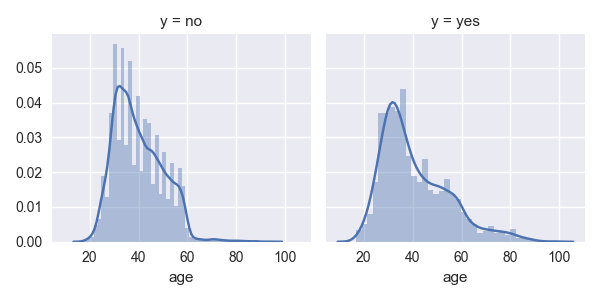

<IPython.core.display.Javascript object>


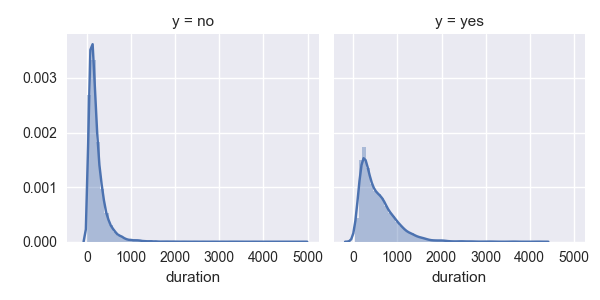

<IPython.core.display.Javascript object>


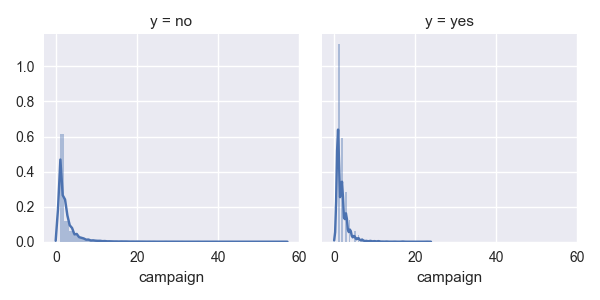

<IPython.core.display.Javascript object>


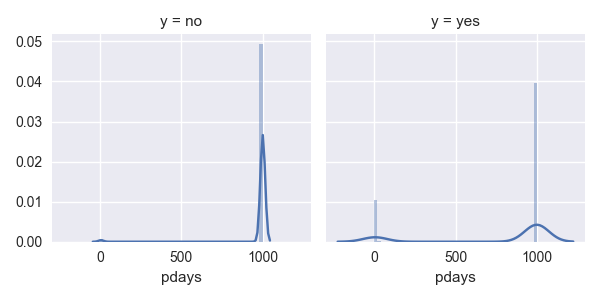

<IPython.core.display.Javascript object>


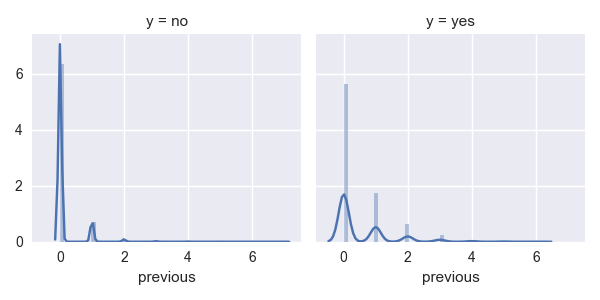

<IPython.core.display.Javascript object>


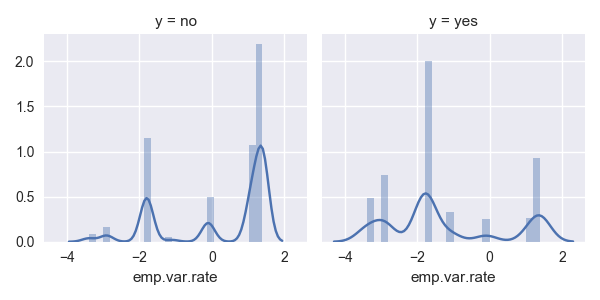

<IPython.core.display.Javascript object>


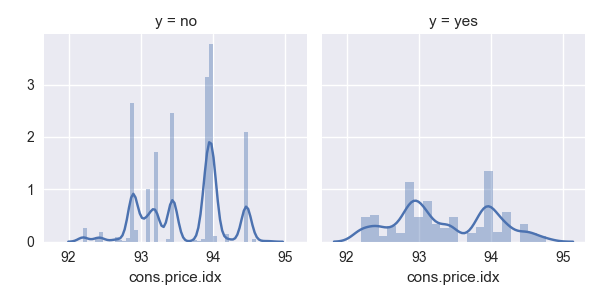

<IPython.core.display.Javascript object>


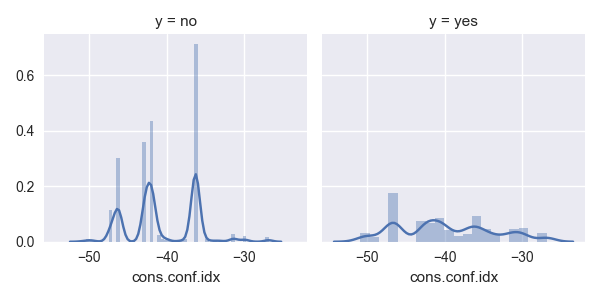

<IPython.core.display.Javascript object>


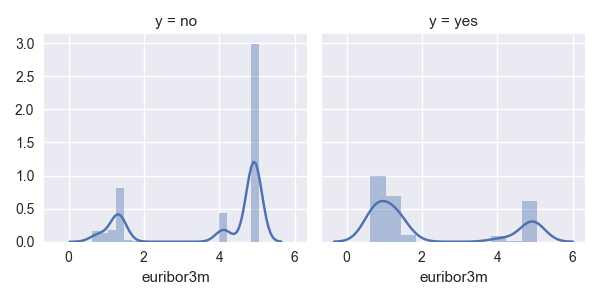

<IPython.core.display.Javascript object>


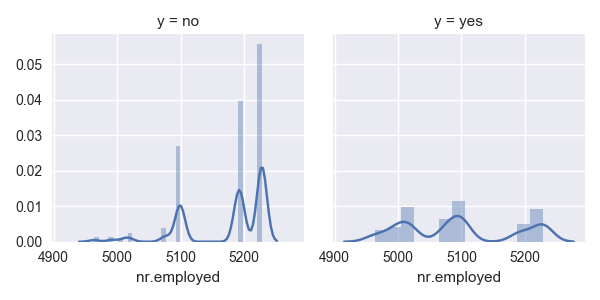

In [596]:
for num in num_colnames:
    sns.FacetGrid(data,col="y").map(sns.distplot,num)

<IPython.core.display.Javascript object>


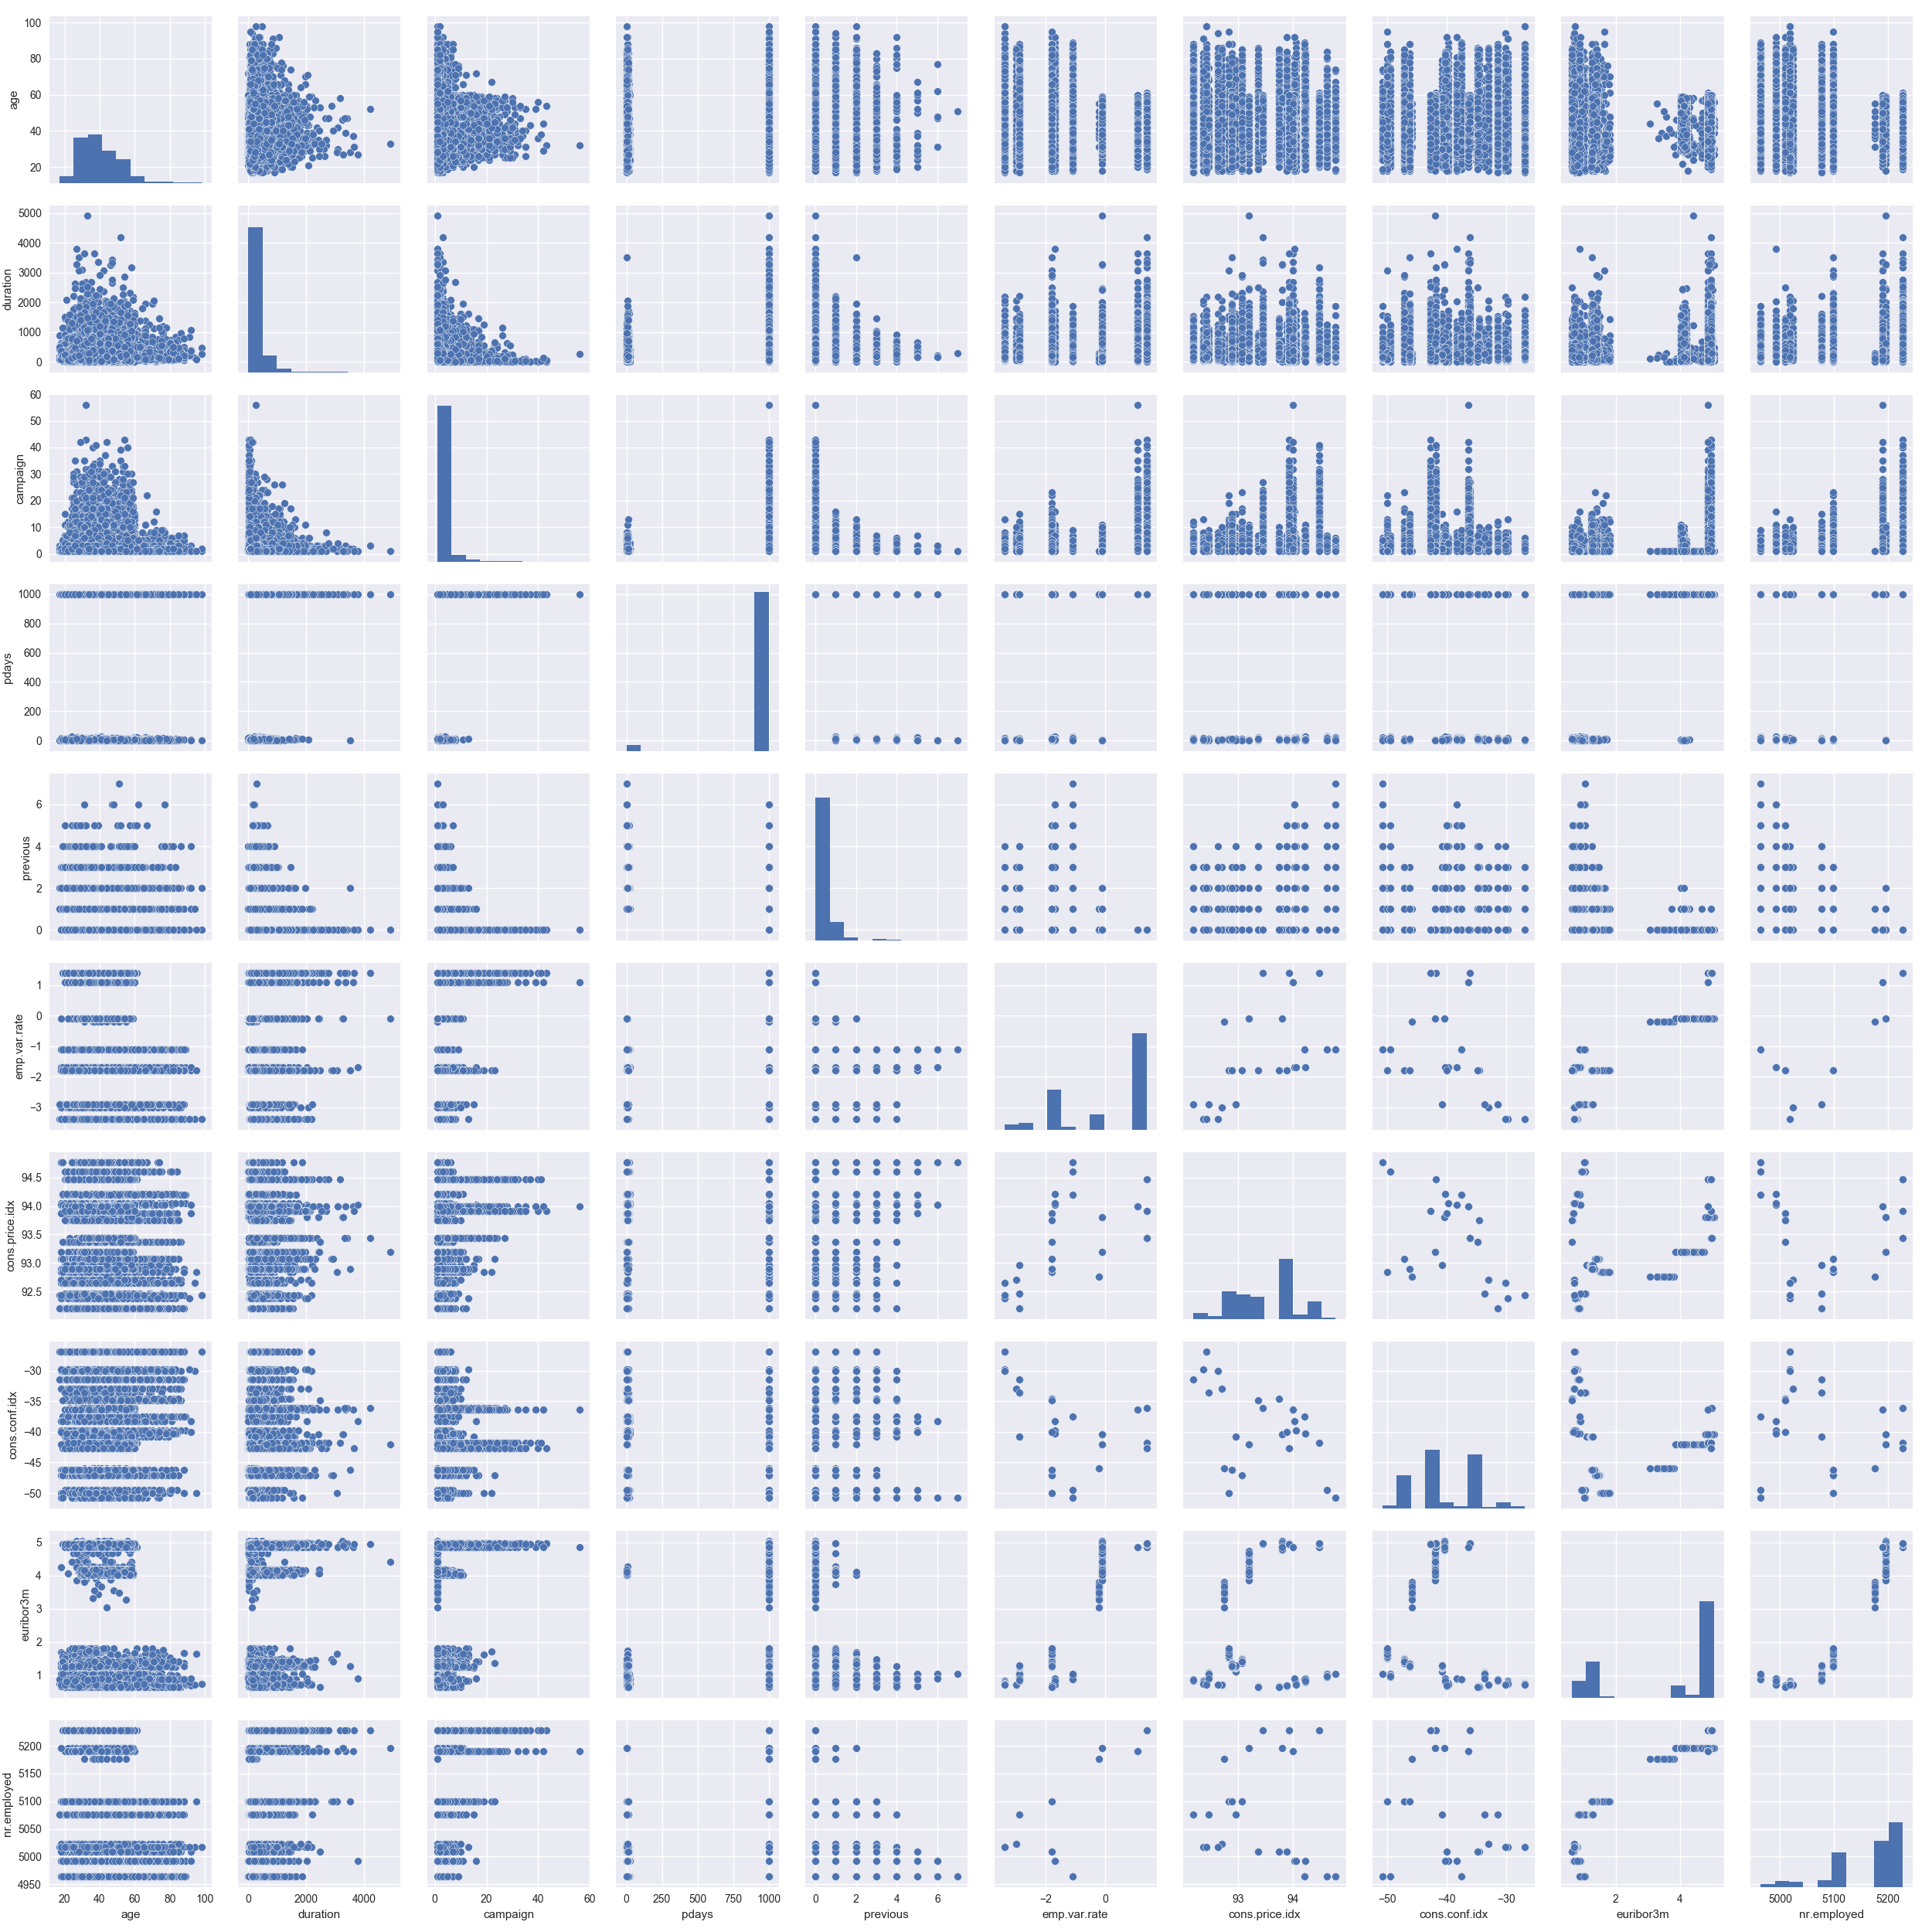

In [599]:
sns.pairplot(data)